In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# Load data

In [2]:
df = pd.read_csv('spambase.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df.shape

(4601, 58)

In [5]:
### get the dummpy variable of labels
df = pd.get_dummies(df, columns=[57])

In [6]:
### check the missing values, there are no missing values in every variable.
sum(df.isnull().sum())

0

In [7]:
df_x  = df.iloc[:,:-2]
df_y = df.iloc[:, [-1,-2]]

In [8]:
## standardlize data
df_x_std = (df_x-df_x.mean()) / df_x.std()
df_x_std.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.342396,0.330849,0.712781,-0.046894,0.011563,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.111534,-0.158436,-0.514251,-0.155181,0.623939,-0.308321,-0.103037,-0.045242,0.045293,-0.008723
1,0.345322,0.051904,0.435082,-0.046894,-0.256089,0.672326,0.244717,-0.088001,-0.323267,1.086593,...,-0.111534,-0.158436,-0.026004,-0.155181,0.126189,0.423737,0.008762,-0.002443,0.250536,1.228191
2,-0.145906,-0.165054,0.851631,-0.046894,1.364698,0.343648,0.193623,0.036666,1.973802,0.016420,...,-0.111534,-0.117364,0.014683,-0.155181,0.008495,0.440005,-0.079746,0.145905,2.220865,3.258378
3,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,0.605791,...,-0.111534,-0.158436,-0.007510,-0.155181,-0.161917,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205
4,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,0.605791,...,-0.111534,-0.158436,-0.014908,-0.155181,-0.164369,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205


# ANN implementation

In [9]:
class Neural_Network():
    def __init__(self, input_dim, output_dim, learning_rate, max_iter, num_layer, num_nodes):
        # parameters
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.num_layer = num_layer
        self.num_nodes = num_nodes
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        # initialize the weight matrix 
        self.W = [np.random.randn(self.input_dim, self.num_nodes)]  # input to hidden layer
        self.B = [np.zeros((1, self.num_nodes))]
        for _ in range(1, self.num_layer):
            self.W.append(np.random.randn(self.num_nodes,self.num_nodes))   # hidden layer to hidden layer
            self.B.append(np.zeros((1, self.num_nodes)))
        self.W.append(np.random.randn(self.num_nodes,self.output_dim))  # hiddern layer to output 
        self.B.append(np.zeros((1, self.output_dim)))      
    
    # activate method: sigmoid
    def sigmoid(self, s):
        return 1.0/(1 + np.exp(-s))
    def sigmod_prime(self, s):
        return s * (1-s)
    
    ## forward
    def forward(self, X):
        # input layer to output layer forward
        self.Z = [X]
        for i in range(0, len(self.W)):
            z = np.dot(self.Z[i], self.W[i]) + self.B[i]
            sz = self.sigmoid(z)
            self.Z.append(sz)
        # return output
        return self.Z[-1]
    
    # backward
    def backward(self,Y, output):
        self.deltaZ = [(output-Y) * self.sigmod_prime(output)]
        self.deltaW = []
        self.deltaB = []
        for i in range(len(self.W)-1,-1,-1):
            deltaW = np.dot(self.Z[i].T, self.deltaZ[-1])
            self.deltaW = [deltaW] + self.deltaW
            deltaB = np.sum(self.deltaZ[-1], axis=0)
            self.deltaB = [deltaB] + self.deltaB
            
            # add backward deltaZ in self.Z
            dz = np.multiply((self.deltaZ[-1] @ self.W[i].T), self.sigmod_prime(self.Z[i]))
            self.deltaZ.append(dz)
        
        # update the parameters
        for i in range(len(self.W)):
            self.W[i] += -1*self.learning_rate*self.deltaW[i]
            self.B[i] += -1*self.learning_rate*self.deltaB[i]
    
    # train the data 
    def train(self, train_x, train_y, print_loss=False):
        self.train_x = train_x
        self.train_y = train_y
        
        for i in range(self.max_iter):
            output  = self.forward(train_x)
            self.backward(train_y, output)
            
            # Forward propogation to calculate the predictions
            if print_loss and i % 50 == 0:
                obs = self.train_x.shape[0]
                loss = - np.sum(train_y * np.log(output))
                print("Loss after iteration %i: %f" %(i, np.sum(loss) / obs))
                
    def predict(self, val_x):
        # Do forward pass
        pred = self.forward(val_x)
        #get y_hat
        y_hat = np.argmax(pred, axis=1)
        return y_hat
    
    def accuracy_score(self,pred,y):
        # Get total number of examples
        m = y.shape[0]
        y_true = y.argmax(axis=1)
        # Calculate the number of wrong examples
        error = np.sum(np.abs(pred-y_true)) 
        # Calculate accuracy
        return (m-error) / m

# Run algorithm

In [10]:
## random split data, training dataset (80%) and test dataset (20%)
from sklearn.model_selection import train_test_split
import random

## data
X = np.array(df_x_std)
Y = np.array(df_y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [11]:
## run k-folder cross validation function 
def cv_train_test_split(X, Y, kfolder= 10):
    X_split, Y_split = [], []
    index = list(range(len(Y)))
    random.shuffle(index)   ## shuffle the index to random select
    fold_size = int(len(X) / kfolder) + (len(X)%kfolder > 0)
    for i in range(kfolder):
        X_fold = X[index[i*fold_size: (i+1)*fold_size]]
        Y_fold = Y[index[i*fold_size: (i+1)*fold_size]]
        X_split.append(X_fold)
        Y_split.append(Y_fold)
    return X_split, Y_split

In [12]:
# data split
nn_X, nn_Y = cv_train_test_split(train_x, train_y)

In [13]:
## run the cross validation function 
def cv_nn(X, Y, input_dim, output_dim, learning_rate, max_iter, num_layer, num_nodes):
    scores = []
    for i in range(10):
        x_train, x_test = np.concatenate(X[:i] + X[i+1:], axis = 0), X[i]
        y_train, y_test = np.concatenate(Y[:i] + Y[i+1:], axis = 0), Y[i]
        NN = Neural_Network(input_dim, output_dim, learning_rate, max_iter, num_layer, num_nodes)
        NN.train(x_train, y_train)
        pred = NN.predict(x_test)
        scores.append(NN.accuracy_score(pred, y_test))
    return sum(scores)/len(scores)

In [14]:
## tune the parameters: 1. max_iter   2. learning rate
# specified parameters, to simplify we choose to have one hidden layer with 5 neurons.
input_dim = train_x.shape[1]
output_dim = 2
num_layer = 1
num_nodes = 5


# unspecifies parameters
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
max_iters = list(range(50, 550,50))
score_matrix = np.zeros((len(learning_rates), len(max_iters)))

for l in range(len(learning_rates)):
    for m in range(len(max_iters)):
        learning_rate, max_iter = learning_rates[l], max_iters[m]
        accu = cv_nn(nn_X, nn_Y, input_dim, output_dim, learning_rate, max_iter, num_layer, num_nodes)
        print('The accuracy score for %f, %d is %.4f' %(learning_rate, max_iter, accu))
        score_matrix[l, m] = accu

The accuracy score for 0.000100, 50 is 0.5875
The accuracy score for 0.000100, 100 is 0.6897
The accuracy score for 0.000100, 150 is 0.7147
The accuracy score for 0.000100, 200 is 0.7087
The accuracy score for 0.000100, 250 is 0.7486
The accuracy score for 0.000100, 300 is 0.7861
The accuracy score for 0.000100, 350 is 0.8280
The accuracy score for 0.000100, 400 is 0.7921
The accuracy score for 0.000100, 450 is 0.8155
The accuracy score for 0.000100, 500 is 0.8296
The accuracy score for 0.000500, 50 is 0.7682
The accuracy score for 0.000500, 100 is 0.8454
The accuracy score for 0.000500, 150 is 0.8690
The accuracy score for 0.000500, 200 is 0.8864
The accuracy score for 0.000500, 250 is 0.8913
The accuracy score for 0.000500, 300 is 0.9016
The accuracy score for 0.000500, 350 is 0.9109
The accuracy score for 0.000500, 400 is 0.9204
The accuracy score for 0.000500, 450 is 0.9155
The accuracy score for 0.000500, 500 is 0.9201
The accuracy score for 0.001000, 50 is 0.8372
The accuracy sco

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


The accuracy score for 0.500000, 200 is 0.5685
The accuracy score for 0.500000, 250 is 0.5410
The accuracy score for 0.500000, 300 is 0.4976
The accuracy score for 0.500000, 350 is 0.5655
The accuracy score for 0.500000, 400 is 0.6005
The accuracy score for 0.500000, 450 is 0.6688
The accuracy score for 0.500000, 500 is 0.6060
The accuracy score for 1.000000, 50 is 0.4924
The accuracy score for 1.000000, 100 is 0.5429
The accuracy score for 1.000000, 150 is 0.6215
The accuracy score for 1.000000, 200 is 0.5815
The accuracy score for 1.000000, 250 is 0.6190
The accuracy score for 1.000000, 300 is 0.5989
The accuracy score for 1.000000, 350 is 0.5821
The accuracy score for 1.000000, 400 is 0.5318
The accuracy score for 1.000000, 450 is 0.5024
The accuracy score for 1.000000, 500 is 0.5378


In [15]:
## heatmap
def plotHeatMap(data, x_title='X Axis', y_title='Y Axis', title='', x_ticks=[], y_ticks=[]):
    
    #Plot it out
    fig, ax = plt.subplots()
    ax = plt.gca()
    heatmap = ax.pcolor(data, edgecolors='k', alpha=0.8)
    
    fig.colorbar(heatmap, ax=ax)
    
    # turn off the frame
    #ax.set_frame_on(False)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(len(x_ticks)) + 0.5, minor=False)
    ax.set_yticks(np.arange(len(y_ticks)) + 0.5, minor=False)
    
    ax.set_xticklabels([str(i) for i in x_ticks], minor=False)
    ax.set_yticklabels([str(y) for y in y_ticks], minor=False)
    
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    
    plt.show()

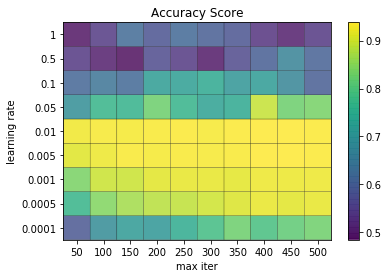

In [16]:
plotHeatMap(score_matrix, y_title='learning rate', x_title='max iter',\
            title='Accuracy Score', y_ticks=learning_rates, x_ticks=max_iters)

In [17]:
np.argmax(score_matrix)

38

In [18]:
def confusion_matrix(pred, y):
    m = y.shape[0]
    y_true = y.argmax(axis=1)
    
    FP = sum((y_true==0) & (pred==1))
    FN = sum((y_true==1) & (pred==0))
    TP = sum((y_true==1) & (pred==1))
    TN = sum((y_true==0) & (pred==0))
    
    ## print performance metrics
    accuracy = (TN + TP) / (TN + TP + FN + FP)
    TPR = TP / (TP + FN)
    PPV = TP / (TP + FP)
    TNR = TN / (TN + FP)
    F1_score = 2*PPV*TPR / (PPV+TPR)
    metric = pd.DataFrame([accuracy, TPR, PPV, TNR, F1_score], ['ACCU', 'TPR', 'PPV', 'TNR', 'F1'], ['score'])
    
    ### print confusion matrix
    conf_matrix = np.array([[TP, FN], [FP, TN]])
    conf = pd.DataFrame(conf_matrix, ['spam', 'not spam'], ['spam', 'not spam'])
    return metric, conf

In [19]:
## find the optimum learning_rate and max_iter, train the training data and test the test_data
learning_rate, max_iter = 0.005, 450
NN = Neural_Network(input_dim, output_dim, learning_rate, max_iter, num_layer, num_nodes)
NN.train(train_x, train_y, print_loss=True)
pred = NN.predict(test_x)
# metrics 
metric, confusion = confusion_matrix(pred, test_y)
print(metric)
print(confusion)

Loss after iteration 0: 1.673941
Loss after iteration 50: 0.230135
Loss after iteration 100: 0.188224
Loss after iteration 150: 0.170416
Loss after iteration 200: 0.161796
Loss after iteration 250: 0.156427
Loss after iteration 300: 0.149862
Loss after iteration 350: 0.146285
Loss after iteration 400: 0.143431
         score
ACCU  0.931596
TPR   0.945205
PPV   0.946827
TNR   0.908012
F1    0.946015
          spam  not spam
spam       552        32
not spam    31       306


# ANNs with Reduced Dimension

In [20]:
## run pca analysis, get the principle components, the first 43 components (90% of variance)
u, s, vh = np.linalg.svd(df_x_std)

s2 = np.cumsum(s**2) / np.sum(s**2)
print(s2)

[0.11564794 0.17297118 0.2081142  0.23641524 0.26354169 0.28920029
 0.314007   0.33812839 0.36085269 0.38325521 0.4046048  0.42443115
 0.4439361  0.46314837 0.48221912 0.50087647 0.51927371 0.53722774
 0.55499377 0.57258701 0.59005918 0.60722171 0.62414334 0.64065816
 0.65708953 0.67330598 0.68936487 0.70523575 0.72055892 0.73575189
 0.75042723 0.7649313  0.77892553 0.79263965 0.80626455 0.81951942
 0.83239801 0.84508326 0.85744449 0.86954722 0.88138239 0.8930665
 0.90392819 0.91460277 0.92481097 0.93493523 0.94413616 0.95271015
 0.96061065 0.96778785 0.97437741 0.98079342 0.98666807 0.99202564
 0.99659442 0.99993237 1.        ]


In [21]:
pc_x = df_x_std @ vh.T[:, :43]

In [22]:
## data
X_PC = np.array(pc_x)
Y_PC = np.array(df_y)

pca_train_x, pca_test_x, pca_train_y, pca_test_y = train_test_split(X_PC, Y_PC, test_size=0.2)

In [23]:
# data split
nn_pca_X, nn_pca_Y = cv_train_test_split(pca_train_x, pca_train_y)

In [24]:
## tune the parameters: 1. max_iter   2. learning rate
# specified parameters, to simplify we choose to have one hidden layer with 5 neurons.
pca_input_dim = pca_train_x.shape[1]
output_dim = 2
num_layer = 1
num_nodes = 5


# unspecifies parameters
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
max_iters = list(range(50, 550,50))
pca_score_matrix = np.zeros((len(learning_rates), len(max_iters)))

for l in range(len(learning_rates)):
    for m in range(len(max_iters)):
        learning_rate, max_iter = learning_rates[l], max_iters[m]
        accu = cv_nn(nn_pca_X, nn_pca_Y, pca_input_dim, output_dim, learning_rate, max_iter, num_layer, num_nodes)
        print('The accuracy score for %f, %d is %.4f' %(learning_rate, max_iter, accu))
        pca_score_matrix[l, m] = accu

The accuracy score for 0.000100, 50 is 0.6087
The accuracy score for 0.000100, 100 is 0.6889
The accuracy score for 0.000100, 150 is 0.7168
The accuracy score for 0.000100, 200 is 0.7791
The accuracy score for 0.000100, 250 is 0.7908
The accuracy score for 0.000100, 300 is 0.7957
The accuracy score for 0.000100, 350 is 0.8022
The accuracy score for 0.000100, 400 is 0.8274
The accuracy score for 0.000100, 450 is 0.8405
The accuracy score for 0.000100, 500 is 0.8429
The accuracy score for 0.000500, 50 is 0.7889
The accuracy score for 0.000500, 100 is 0.8399
The accuracy score for 0.000500, 150 is 0.8924
The accuracy score for 0.000500, 200 is 0.8788
The accuracy score for 0.000500, 250 is 0.8995
The accuracy score for 0.000500, 300 is 0.9092
The accuracy score for 0.000500, 350 is 0.9106
The accuracy score for 0.000500, 400 is 0.9171
The accuracy score for 0.000500, 450 is 0.9185
The accuracy score for 0.000500, 500 is 0.9231
The accuracy score for 0.001000, 50 is 0.8318
The accuracy sco

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


The accuracy score for 0.500000, 50 is 0.5905
The accuracy score for 0.500000, 100 is 0.5856
The accuracy score for 0.500000, 150 is 0.6057
The accuracy score for 0.500000, 200 is 0.5905
The accuracy score for 0.500000, 250 is 0.5410
The accuracy score for 0.500000, 300 is 0.5530
The accuracy score for 0.500000, 350 is 0.5861
The accuracy score for 0.500000, 400 is 0.6788
The accuracy score for 0.500000, 450 is 0.5799
The accuracy score for 0.500000, 500 is 0.5207
The accuracy score for 1.000000, 50 is 0.4935
The accuracy score for 1.000000, 100 is 0.6114
The accuracy score for 1.000000, 150 is 0.4905
The accuracy score for 1.000000, 200 is 0.5111
The accuracy score for 1.000000, 250 is 0.6228
The accuracy score for 1.000000, 300 is 0.5356
The accuracy score for 1.000000, 350 is 0.5992
The accuracy score for 1.000000, 400 is 0.5783
The accuracy score for 1.000000, 450 is 0.5851
The accuracy score for 1.000000, 500 is 0.5802


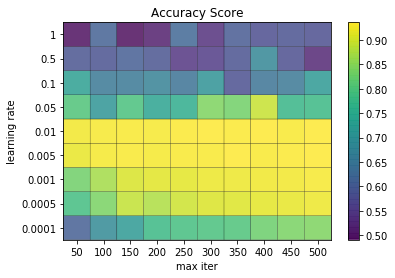

In [25]:
plotHeatMap(pca_score_matrix, y_title='learning rate', x_title='max iter',\
            title='Accuracy Score', y_ticks=learning_rates, x_ticks=max_iters)

In [26]:
np.argmax(pca_score_matrix)

45

In [29]:
## find the optimum learning_rate and max_iter, train the training data and test the test_data
learning_rate, max_iter = 0.01, 300
NN = Neural_Network(pca_input_dim, output_dim, learning_rate, max_iter, num_layer, num_nodes)
NN.train(pca_train_x, pca_train_y, print_loss=True)
pred = NN.predict(pca_test_x)
# metrics 
metric, confusion = confusion_matrix(pred, pca_test_y)
print(metric)
print(confusion)

Loss after iteration 0: 1.006612
Loss after iteration 50: 0.200568
Loss after iteration 100: 0.175663
Loss after iteration 150: 0.169453
Loss after iteration 200: 0.167049
Loss after iteration 250: 0.165925
         score
ACCU  0.920738
TPR   0.950092
PPV   0.917857
TNR   0.878947
F1    0.933697
          spam  not spam
spam       514        27
not spam    46       334
